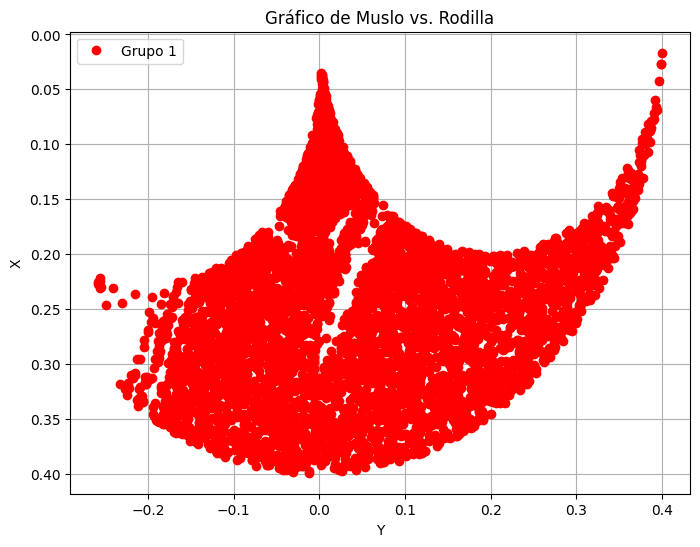

In [33]:
import random
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sympy as sp
import time

def TransformacionDH(theta, d, a, alpha):
    # theta y alpha en radianes
    # d y a en metros
    Rz = sp.Matrix([[sp.cos(theta), -sp.sin(theta), 0, 0],
                   [sp.sin(theta), sp.cos(theta), 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])
    tz = sp.Matrix([[1, 0, 0, 0],
                   [0, 1, 0, 0],
                   [0, 0, 1, d],
                   [0, 0, 0, 1]])
    ta = sp.Matrix([[1, 0, 0, a],
                   [0, 1, 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])
    Rx = sp.Matrix([[1, 0, 0, 0],
                   [0, sp.cos(alpha), -sp.sin(alpha), 0],
                   [0, sp.sin(alpha), sp.cos(alpha), 0],
                   [0, 0, 0, 1]])
    T = Rz*tz*ta*Rx
    return T


# Definir el radio de la pierna (longitud)
radio_pierna = 0.4

# Generar puntos aleatorios dentro del semicírculo
puntos_dentro_semicirculo = []

x_centro = 0
y_centro = 0.2 # 

for _ in range(20000):  # Puedes ajustar la cantidad de puntos que deseas generar
    # Generar un ángulo aleatorio en el rango [-90°, 90°]
    angulo = random.uniform(-math.pi/2, math.pi/2)
    #angulo = random.uniform(-math.pi, 0)

    # Generar una distancia aleatoria dentro del rango [0, radio_pierna]
    distancia = random.uniform(0, radio_pierna)

    # Calcular las coordenadas (x, y) del punto
    x = distancia * math.cos(angulo)
    y = distancia * math.sin(angulo)

    # Asegurarse de que x no sea menor que 0.0
    #x = max(0.0, x)

    # Agregar el punto a la lista
    distancia_al_centro = np.sqrt((x - x_centro)**2 + (y - y_centro)**2)
    if distancia_al_centro >= 0.199999:
        puntos_dentro_semicirculo.append((x, y))

# Extraer las coordenadas x e y de los puntos
coord_x, coord_y = zip(*puntos_dentro_semicirculo)

q1 = sp.symbols('q1')
q2 = sp.symbols('q2')

mov_x = coord_x
mov_y = coord_y
    
T = sp.simplify(TransformacionDH(q1, 0, 0.2, 0)* TransformacionDH(q2, 0, 0.2, 0))
    
df = pd.DataFrame(columns=['Muslo', 'Rodilla','PosX','PosY','Largo_Extremidades(m)'])
    
if len(mov_x) != len(mov_y):
    print("Dimensiones de mov_x y mov_y no coinsiden",len(mov_x) ,len(mov_y))
    
for i in range(len(mov_y)):
    a=mov_y[i]
    b=mov_x[i]
    # definimos las ecuaciones a resolver
    ec1, ec2 = T[3]-a, T[7]-b
    (ec1, ec2)
    # ahora resolvemos la ecuación utilizando nsolve()
    try:
        q = sp.nsolve((ec1, ec2),(q1,q2),(1,-1), prec=6)
        if 0 <= q[0] <= 3 and -2.96706 <= q[1] <= 0:
            df.loc[len(df)] = {'Muslo': q[0]-1.5, 'Rodilla': q[1],'PosX': b,'PosY': a,'Largo_Extremidades(m)':0.2}
    except:
        #print(a,b)
        #print("no se pudo calcular")
        q = [0, 0, 0]

#filtro_muslo = (df['Muslo'] >= 0) & (df['Muslo'] <= 3) # Agregamos 90° (1.5) + para mapear la mayor zona posible
#filtro_rodilla = (df['Rodilla'] >= -2.96706) & (df['Rodilla'] <= 0)
#filtro_rodilla = (df['Rodilla'] >= -2.96706) & (df['Rodilla'] <= 0)

# Aplicar los filtros y obtener el DataFrame filtrado
#df_filtrado = df.loc[filtro_muslo & filtro_rodilla]
#df_filtrado['Muslo'] = df_filtrado['Muslo'] - 1.5

#------------------------------------------------------------------------------------------
#
#       Descomentar si se quiere guardar en csv
#
#------------------------------------------------------------------------------------------
# Guardar como nuevo/sobreescribir, y se le agrega el titulo de las columnas
df.to_csv('datos_entrenamiento2.csv', mode='w', header=True, index=False)

#Para agregar sin sobreescribir
#df_filtrado.to_csv('datos_entrenamiento_new.csv', mode='a', header=False, index=False)


plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.plot(df['PosY'], df['PosX'], 'ro', label='Grupo 1')  # Grupo 1 en rojo ('ro')
plt.xlabel('Y')  # Etiqueta eje X
plt.ylabel('X')  # Etiqueta eje Y
plt.title('Gráfico de Muslo vs. Rodilla')  # Título del gráfico
plt.legend()  # Mostrar leyenda
#plt.gca().invert_xaxis()  # Invertir eje X
plt.gca().invert_yaxis()  # Invertir eje Y
# Muestra el gráfico
plt.grid(True)  # Agregar cuadrícula
plt.show()

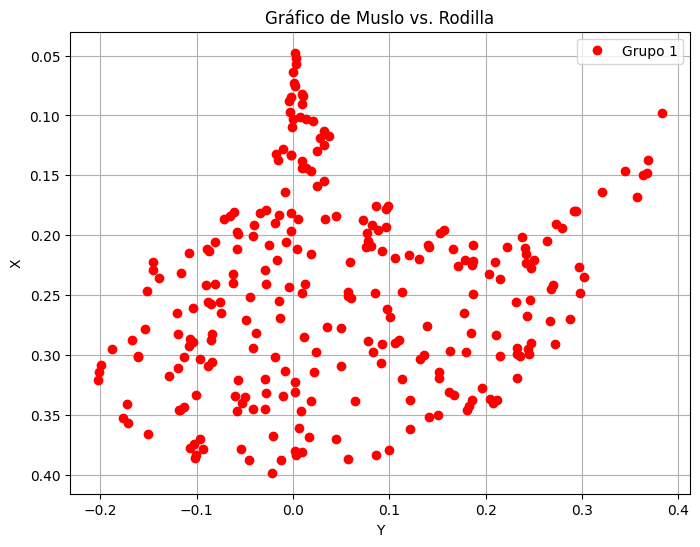

In [31]:
#df_filtrado['Muslo'] = df_filtrado['Muslo'] - 1.5
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.plot(df_filtrado['PosY'], df_filtrado['PosX'], 'ro', label='Grupo 1')  # Grupo 1 en rojo ('ro')
plt.xlabel('Y')  # Etiqueta eje X
plt.ylabel('X')  # Etiqueta eje Y
plt.title('Gráfico de Muslo vs. Rodilla')  # Título del gráfico
plt.legend()  # Mostrar leyenda
#plt.gca().invert_xaxis()  # Invertir eje X
plt.gca().invert_yaxis()  # Invertir eje Y
# Muestra el gráfico
plt.grid(True)  # Agregar cuadrícula
plt.show()

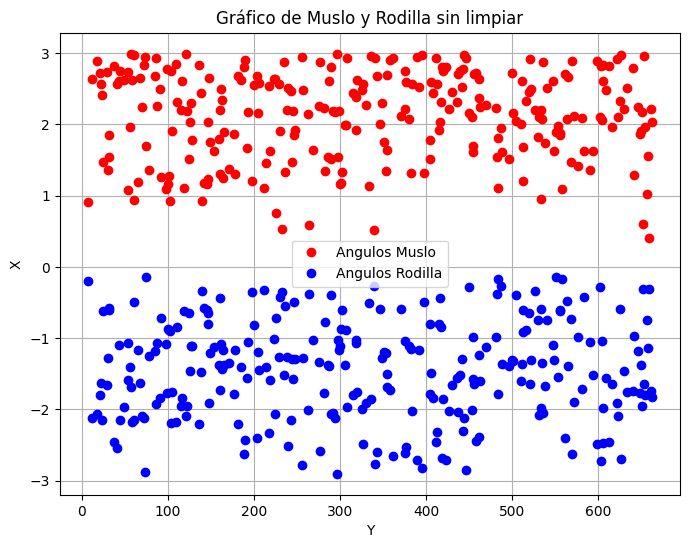

In [30]:
filtro_muslo = (df['Muslo'] >= 0) & (df['Muslo'] <= 3) # Agregamos 90° (1.5) + para mapear la mayor zona posible
#filtro_rodilla = (df['Rodilla'] >= -2.96706) & (df['Rodilla'] <= 0)
filtro_rodilla = (df['Rodilla'] >= -2.96706) & (df['Rodilla'] <= 0)

# Aplicar los filtros y obtener el DataFrame filtrado
df_filtrado = df.loc[filtro_muslo & filtro_rodilla]
#df_filtrado['Muslo'] = df_filtrado['Muslo'] - 1.5
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.plot(df_filtrado['Muslo'], 'ro', label='Angulos Muslo')  # Grupo 1 en rojo ('ro')
plt.plot(df_filtrado['Rodilla'], 'bo', label='Angulos Rodilla')  # Grupo 1 en rojo ('ro')
plt.xlabel('Y')  # Etiqueta eje X
plt.ylabel('X')  # Etiqueta eje Y
plt.title('Gráfico de Muslo y Rodilla sin limpiar')  # Título del gráfico
plt.legend()  # Mostrar leyenda
""" plt.gca().invert_xaxis()  # Invertir eje X
plt.gca().invert_yaxis()  # Invertir eje Y """
# Muestra el gráfico
plt.grid(True)  # Agregar cuadrícula
plt.show()

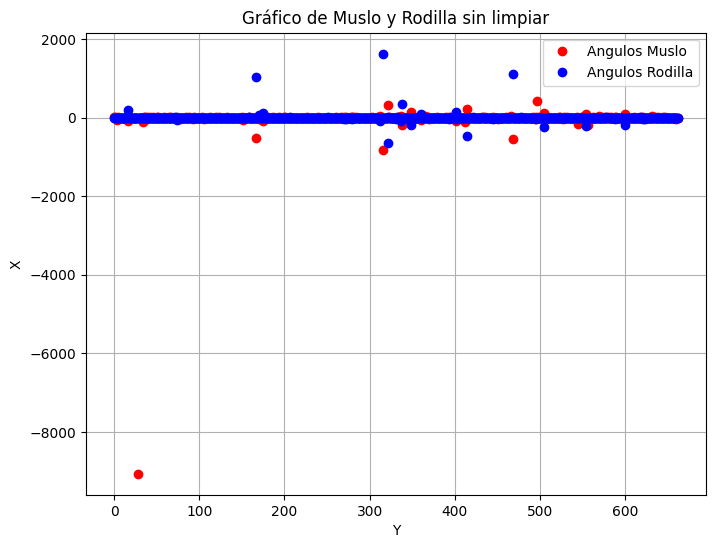

In [16]:
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.plot(df['Muslo'], 'ro', label='Angulos Muslo')  # Grupo 1 en rojo ('ro')
plt.plot(df['Rodilla'], 'bo', label='Angulos Rodilla')  # Grupo 1 en rojo ('ro')
plt.xlabel('Y')  # Etiqueta eje X
plt.ylabel('X')  # Etiqueta eje Y
plt.title('Gráfico de Muslo y Rodilla sin limpiar')  # Título del gráfico
plt.legend()  # Mostrar leyenda
""" plt.gca().invert_xaxis()  # Invertir eje X
plt.gca().invert_yaxis()  # Invertir eje Y """
# Muestra el gráfico
plt.grid(True)  # Agregar cuadrícula
plt.show()